In [ ]:
# 基础工具
import numpy as np
import pandas as pd

# 可视化
import matplotlib.pyplot as plt
import seaborn as sns

# 评估指标
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df_results = pd.read_csv("zero_shot_predictions.csv")



In [10]:
#载入 Zero-shot 预测 CSV + 恢复 true/pred labels
# Step 4-1: Load zero-shot prediction results

import pandas as pd

df_results = pd.read_csv("zero_shot_predictions.csv")

true_numeric = df_results["true_label"]
pred_numeric = df_results["pred_label"]

print("Loaded zero-shot results!")
df_results.head()


Loaded zero-shot results!


,text,true_label,pred_label
0,Nightclub rating only...\n\nWe got lucky becau...,1,1
1,"Absolutely atrocious service, while there were...",0,1
2,Worst customer service ever. While some thing...,0,0
3,L.A. people are so spoiled with wonderful sush...,1,1
4,Great double date place that allowed us to bri...,1,1


In [6]:
#性能评估
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

zero_acc = accuracy_score(true_numeric, pred_numeric)
print("Zero-shot Accuracy:", zero_acc)

print("\nClassification Report:\n")
print(classification_report(true_numeric, pred_numeric))

cm_zero = confusion_matrix(true_numeric, pred_numeric)
print("\nConfusion Matrix:\n", cm_zero)


Zero-shot Accuracy: 0.789

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1011
           1       0.78      0.80      0.79       989

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000


Confusion Matrix:
 [[782 229]
 [193 796]]


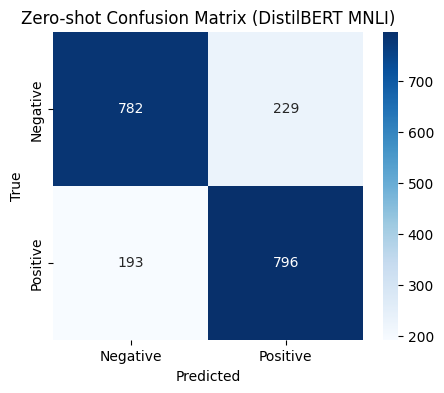

In [7]:
#画 Zero-shot 混淆矩阵热力图
plt.figure(figsize=(5,4))
sns.heatmap(cm_zero, annot=True, cmap="Blues", fmt="d",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Zero-shot Confusion Matrix (DistilBERT MNLI)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


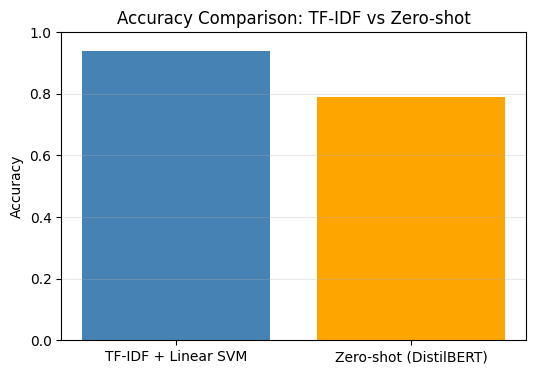

In [8]:
#对比
tfidf_acc = 0.939  # TODO: 用你 Step 2 的实际数字替换

plt.figure(figsize=(6,4))
plt.bar(["TF-IDF + Linear SVM", "Zero-shot (DistilBERT)"],
        [tfidf_acc, zero_acc],
        color=["steelblue", "orange"])

plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: TF-IDF vs Zero-shot")
plt.ylim(0, 1.0)
plt.grid(axis="y", alpha=0.3)
plt.show()


In [9]:
#error analysis核心分析
errors = df_results[df_results["true_label"] != df_results["pred_label"]]

print("Total errors:", len(errors))

neg_to_pos = errors[(errors["true_label"] == 0) & (errors["pred_label"] == 1)]
pos_to_neg = errors[(errors["true_label"] == 1) & (errors["pred_label"] == 0)]

print("Negative → Positive:", len(neg_to_pos))
print("Positive → Negative:", len(pos_to_neg))

print("\nSample Negative→Positive errors:")
display(neg_to_pos.sample(3, random_state=42)[["text", "true_label", "pred_label"]])

print("\nSample Positive→Negative errors:")
display(pos_to_neg.sample(3, random_state=42)[["text", "true_label", "pred_label"]])


Total errors: 422
Negative → Positive: 229
Positive → Negative: 193

Sample Negative→Positive errors:


,text,true_label,pred_label
1865,Came in and really liked the decor. Decorated ...,0,1
639,Well here again not much has changed. Brisket ...,0,1
68,As a big fan of Mr. Ramsay I have rather high ...,0,1



Sample Positive→Negative errors:


,text,true_label,pred_label
451,Awsome!\nThank you!,1,0
1440,"Holy crap.\n\nOnce you get past the line, the ...",1,0
799,I was in town this past weekend with my son an...,1,0
